In [2]:
import matplotlib as mpl
import shutil
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


MAIZECRAYOLA = '#E8C547'
BLUEGRAY = '#6290C3'
ASH_BLACK = '#111111'
RUBY = '#D81E5B'
MATRIXGREEN = '#03A062'

YellowToBlue = mcolors.LinearSegmentedColormap.from_list('my_custom_cmap', [MAIZECRAYOLA, BLUEGRAY], N=256)
YellowToBlue_r = mcolors.LinearSegmentedColormap.from_list('my_custom_cmap', [BLUEGRAY, MAIZECRAYOLA], N=256)
YellowBlackBlue = mcolors.LinearSegmentedColormap.from_list('my_custom_cmap', [MAIZECRAYOLA, ASH_BLACK, BLUEGRAY], N=256)
YellowBlackBlue_r = mcolors.LinearSegmentedColormap.from_list('my_custom_cmap', [BLUEGRAY, ASH_BLACK, MAIZECRAYOLA], N=256)


# Update rcParams globally
plt.rcParams.update({
    # Enable LaTeX
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    
    # Figure & Saveface
    "figure.figsize": (9.6, 5.4),
    "figure.facecolor": ASH_BLACK,
    "savefig.facecolor": ASH_BLACK,
    
    # Axes
    "axes.facecolor": ASH_BLACK,
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "axes.linewidth": 1,
    "axes.spines.top": False,   # Global hide
    "axes.spines.right": False, # Global hide
    
    # Ticks (The style you requested)
    "xtick.color": "white",
    "ytick.color": "white",
    "xtick.direction": "inout",
    "ytick.direction": "inout",
    "xtick.major.size": 10,     # length
    "ytick.major.size": 10,
    "xtick.major.width": 1,
    "ytick.major.width": 1,
    "xtick.labelsize": 16 * (6.431 / 3.48),
    "ytick.labelsize": 16 * (6.431 / 3.48),
    "xtick.major.pad": 10,
    "ytick.major.pad": 10,
})


# 1. ENABLE FULL LATEX RENDERING
plt.rcParams['text.usetex'] = True

# 2. INJECT PACKAGE AND DEFINITIONS
# We define a custom color 'myMaize' using the hex code (strip the #)
plt.rcParams['text.latex.preamble'] = r'''
    \usepackage{amsmath}
    \usepackage{amsfonts}
    \usepackage{amssymb}
    \usepackage{xcolor}

    \definecolor{ashBlack}{HTML}{111111}
    \definecolor{matrixGreen}{HTML}{03A062}
    \definecolor{matrixBlue}{HTML}{03A0C2}
    \definecolor{maizeCrayola}{HTML}{E8C547}
    \definecolor{blueGray}{HTML}{6290C3}
    \definecolor{ruby}{HTML}{D81E5B}
'''

# 3. FORCE SERIF FONT (The "LaTeX Look")
# This must run before you create the figure
plt.rcParams['font.family'] = 'serif' 
plt.rcParams['font.serif'] = ['Computer Modern Roman']

# From Jupyter to Substack

This notebook demonstrates the `nb2wb` converter. It covers the three pillars
of technical writing: prose, mathematics, and code.

## 1  Inline LaTeX → Unicode

Inline expressions like $\alpha + \beta = \gamma$ or $E = mc^2$ are converted
to Unicode so they render as plain readable text in Substack's editor.

Other examples: the golden ratio $\phi = \frac{1+\sqrt{5}}{2}$, and Euler's
identity $e^{i\pi} + 1 = 0$.

## 2  Display Math → Image

Block equations are rendered to crisp PNG images.

The quadratic formula:

$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

Bayes' theorem:

$$P(A \mid B) = \frac{P(B \mid A)\, P(A)}{P(B)}$$

A matrix equation:

\[
  \mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon}
\]

## 3  Code Blocks → Image

Code cells and their outputs are rendered as syntax-highlighted images,
so formatting and colours are perfectly preserved.

In [1]:
def fibonacci(n):
    """Yield the first n Fibonacci numbers."""
    a, b = 0, 1
    for _ in range(n):
        yield a
        a, b = b, a + b

print("Fibonacci sequence (first 10 terms):")
print(*fibonacci(10))

Fibonacci sequence (first 10 terms):
0 1 1 2 3 5 8 13 21 34


In [2]:
import numpy as np

x = np.arange(10)
x ** 2

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

## 4  Mixed: equation in context

The softmax function maps a vector $\mathbf{z} \in \mathbb{R}^K$ to a
probability distribution:

$$\sigma(\mathbf{z})_j = \frac{e^{z_j}}{\sum_{k=1}^{K} e^{z_k}}$$

Here $j = 1, \ldots, K$ indexes the classes.  Note that $\sum_j \sigma_j = 1$
by construction.

In [3]:
import numpy as np

def softmax(z):
    e = np.exp(z - z.max())   # numerical stability
    return e / e.sum()

z = np.array([1.0, 2.0, 3.0])
probs = softmax(z)
print(f"softmax({z.tolist()}) = {np.array2string(probs, precision=4)}")

softmax([1.0, 2.0, 3.0]) = [0.09   0.2447 0.6652]


## 5  Figures

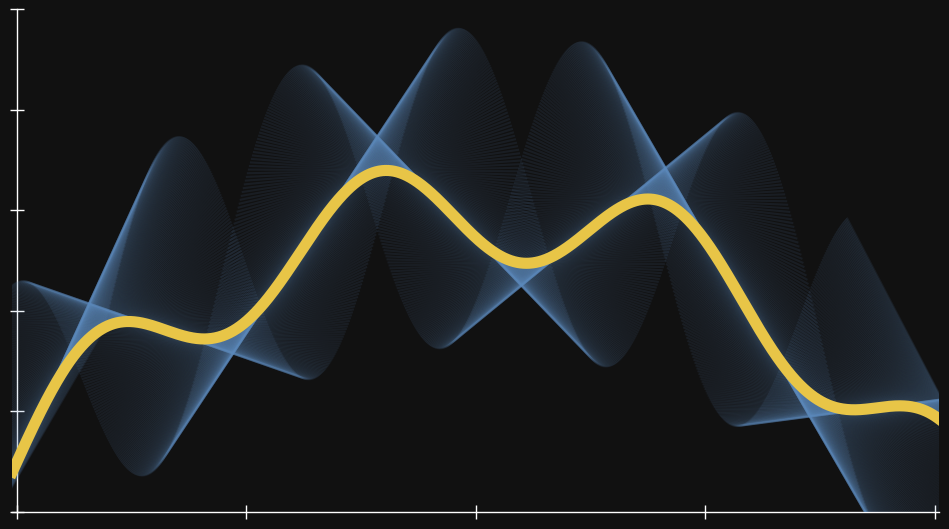

In [ ]:
def f(x):
    return np.sin(x) - 0.05 * (10 - x)**2 + 6


def f_prime(x):
    return np.cos(x) + 0.1 * (10 - x)


def f_tangent(x, a):
    return f(a) + f_prime(a) * (x - a)


def f_secant(x, a, b):
    slope = (f(a) - f(b)) / (a - b)
    return f(b) + slope * (x - b)


with plt.style.context("dark_background"):
    x_min = -0.1
    x_max = 20.1
    fig = plt.figure(figsize=(19.2/2, 10.8/2))
    fig.patch.set_facecolor(ASH_BLACK)
    ax = plt.gca()
    ax.set_facecolor(ASH_BLACK)
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([0, 10])S
    
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position('zero')

    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_axisbelow(True)

    X = np.linspace(x_min-1, x_max+1, 2000)
    y = f(X)
    ax.plot(X, y, c=MAIZECRAYOLA, linewidth=8, zorder=11)

    tangent_pts = np.linspace(x_min - 1, x_max + 1, 1000)
    for x0 in tangent_pts:
        X_tan = np.linspace(x0 - 3, x0 + 3, 100)
        ax.plot(X_tan, f_tangent(X_tan, x0), c=BLUEGRAY, zorder=9, alpha=0.1)

    plt.tight_layout()
    plt.show()